## Implementation of K Nearest Neighbours Algorithm
Given a data point,  
- Calculate its distance from all the other data points in the dataset.  
- Get the closest K points.  
- *Regression:* Get the average of their values.  
- *Classification:* Get the label with the majority vote. 

In [44]:
import numpy as np
from collections import Counter

In [45]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        #compute the distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        #get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        #majority votes
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [46]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

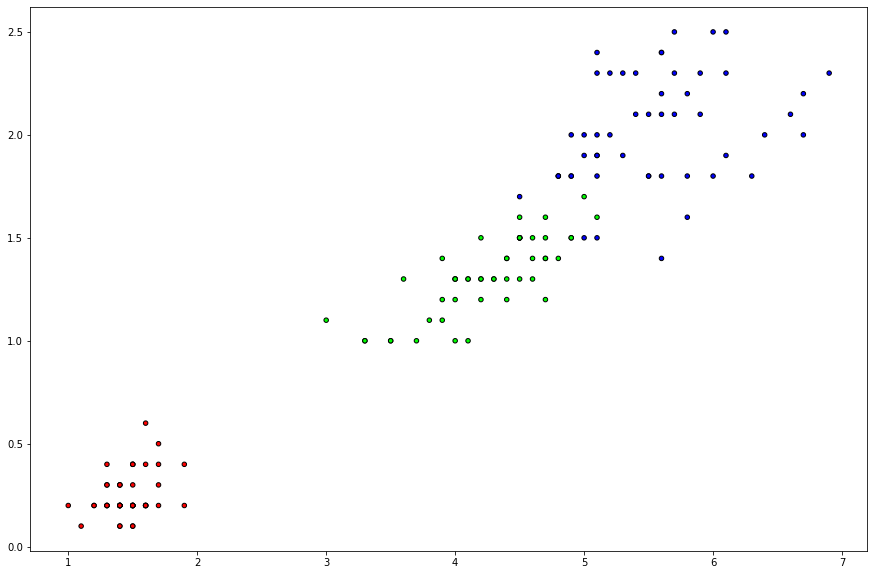

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

plt.figure(figsize=(15,10))
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [48]:
clf = KNN(k = 5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

[0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2]


In [49]:
acc = np.sum(predictions == y_test)/len(y_test)
print(acc)

1.0
